# Bank Premium Prediction Dataset

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Bank_premium_prediction.csv')

In [3]:
data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
data.tail()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1
79852,71531,0.550,15709,280140,1.0,0.0,1.0,99.84,8,A,Urban,0


In [5]:
data.shape

(79853, 12)

In [6]:
data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [7]:
data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

## Preprocessing 1

In [9]:
data = data.drop('id',1)

In [10]:
data.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [11]:
data.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [12]:
data['Count_3-6_months_late'] = data['Count_3-6_months_late'].fillna(data['Count_3-6_months_late'].median())

In [13]:
data['Count_6-12_months_late'] = data['Count_6-12_months_late'].fillna(data['Count_6-12_months_late'].median())

In [14]:
data['Count_more_than_12_months_late'] = data['Count_more_than_12_months_late'].fillna(data['Count_more_than_12_months_late'].median())

In [15]:
data['application_underwriting_score'] = data['application_underwriting_score'].fillna(data['application_underwriting_score'].mean())

In [16]:
data.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

Replacing the outliers with mean value
Formula for Outliers is < Q1 - 1.5 * IQR or > Q3 + 1.5 * IQR

<AxesSubplot:>

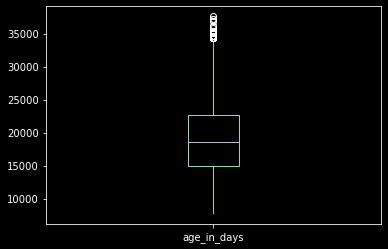

In [17]:
data['age_in_days'].plot.box()

In [18]:
data.loc[data['age_in_days']>34000,'age_in_days']=np.mean(data['age_in_days'])

<AxesSubplot:>

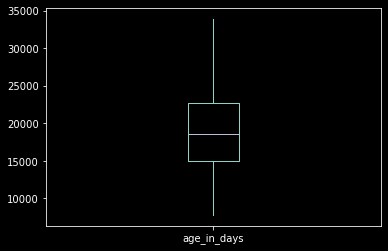

In [19]:
data['age_in_days'].plot.box()

<AxesSubplot:>

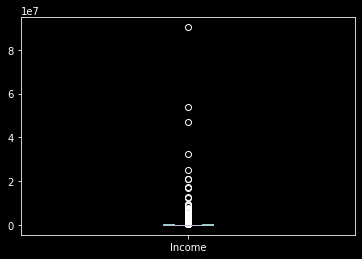

In [20]:
data['Income'].plot.box()

In [21]:
data.loc[data['Income']>400710,'Income']=np.mean(data['Income'])

<AxesSubplot:>

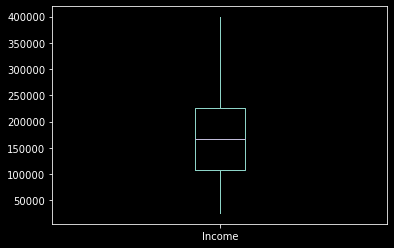

In [22]:
data['Income'].plot.box()

<AxesSubplot:>

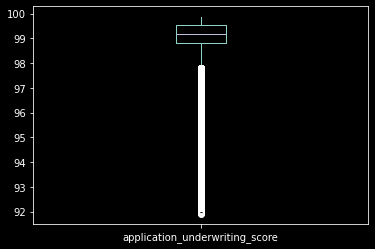

In [23]:
data['application_underwriting_score'].plot.box()

In [24]:
data.loc[data['application_underwriting_score']<98.5,'application_underwriting_score']=np.mean(data['application_underwriting_score'])

<AxesSubplot:>

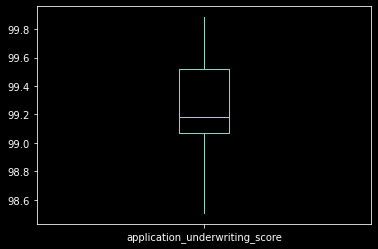

In [25]:
data['application_underwriting_score'].plot.box()

<AxesSubplot:xlabel='age_in_days', ylabel='Income'>

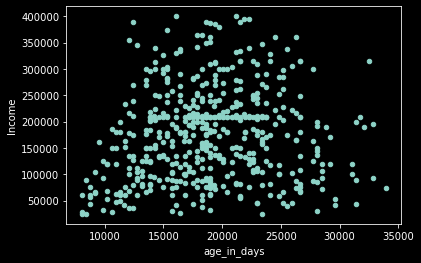

In [26]:
data.iloc[:500,:].plot.scatter('age_in_days','Income')

## Univariate and Bivariate Analysis

In [27]:
data.describe(include='all')

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
count,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853,79853,79853.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Urban,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43134,48183,NaN
mean,0.314288,18837.727508,175027.957927,0.248369,0.078093,0.059935,99.250674,10.863887,NaN,NaN,0.937410
std,0.334915,5194.633775,84881.826471,0.691102,0.436251,0.311840,0.348968,5.170687,NaN,NaN,0.242226
min,0.000000,7670.000000,24030.000000,0.000000,0.000000,0.000000,98.500000,2.000000,NaN,NaN,0.000000
25%,0.034000,14974.000000,108010.000000,0.000000,0.000000,0.000000,99.067291,7.000000,NaN,NaN,1.000000
50%,0.167000,18625.000000,166560.000000,0.000000,0.000000,0.000000,99.180000,10.000000,NaN,NaN,1.000000
75%,0.538000,22636.000000,225070.000000,0.000000,0.000000,0.000000,99.520000,14.000000,NaN,NaN,1.000000


<AxesSubplot:ylabel='Frequency'>

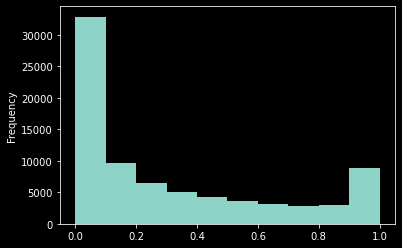

In [28]:
data['perc_premium_paid_by_cash_credit'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

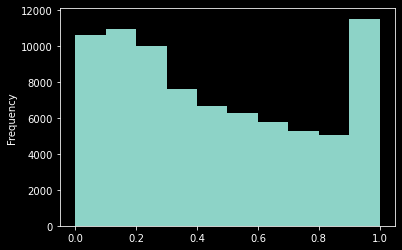

In [29]:
data['perc_premium_paid_by_cash_credit'] = np.sqrt(data['perc_premium_paid_by_cash_credit'])

data['perc_premium_paid_by_cash_credit'].plot.hist()

<AxesSubplot:>

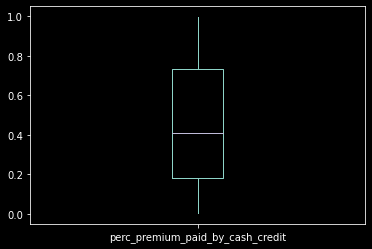

In [30]:
data['perc_premium_paid_by_cash_credit'].plot.box()

<AxesSubplot:ylabel='Frequency'>

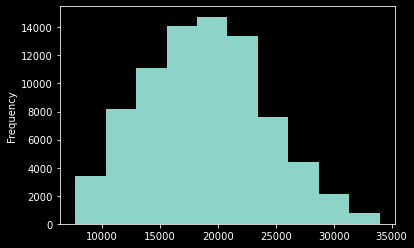

In [31]:
data['age_in_days'].plot.hist()

<AxesSubplot:>

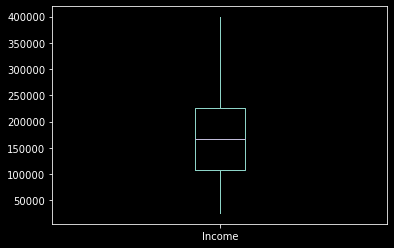

In [32]:
data['Income'].plot.box()

<AxesSubplot:ylabel='Frequency'>

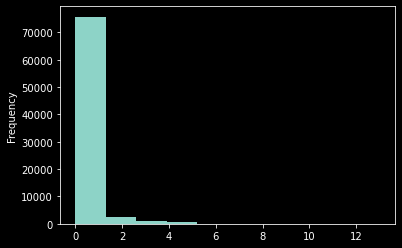

In [33]:
data['Count_3-6_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

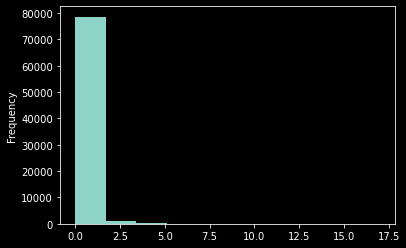

In [34]:
data['Count_6-12_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

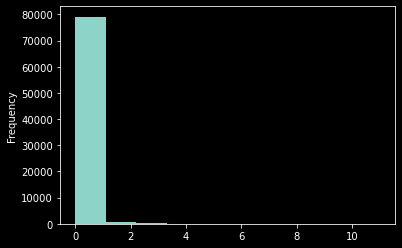

In [35]:
data['Count_more_than_12_months_late'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

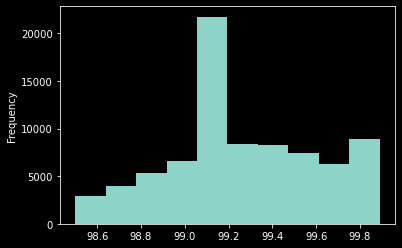

In [36]:
data['application_underwriting_score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

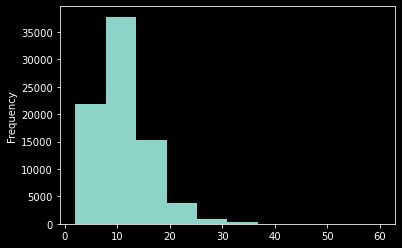

In [37]:
data['no_of_premiums_paid'].plot.hist()

In [38]:
data['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

<AxesSubplot:>

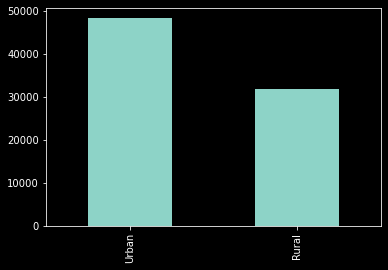

In [39]:
data['residence_area_type'].value_counts().plot.bar()

In [40]:
data.corr()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
perc_premium_paid_by_cash_credit,1.000000,-0.261016,-0.087542,0.205946,0.185673,0.153447,-0.164858,-0.093523,-0.221127
age_in_days,-0.261016,1.000000,0.103082,-0.057704,-0.072418,-0.059070,0.075466,0.177794,0.095266
Income,-0.087542,0.103082,1.000000,-0.005537,-0.064639,-0.038907,0.013976,0.256077,0.066306
Count_3-6_months_late,0.205946,-0.057704,-0.005537,1.000000,0.204286,0.296139,-0.081080,0.076435,-0.246469
Count_6-12_months_late,0.185673,-0.072418,-0.064639,0.204286,1.000000,0.266337,0.019861,-0.092593,-0.284034
Count_more_than_12_months_late,0.153447,-0.059070,-0.038907,0.296139,0.266337,1.000000,-0.022758,-0.021409,-0.238482
application_underwriting_score,-0.164858,0.075466,0.013976,-0.081080,0.019861,-0.022758,1.000000,-0.291519,0.038965
no_of_premiums_paid,-0.093523,0.177794,0.256077,0.076435,-0.092593,-0.021409,-0.291519,1.000000,0.022664
target,-0.221127,0.095266,0.066306,-0.246469,-0.284034,-0.238482,0.038965,0.022664,1.000000


<AxesSubplot:>

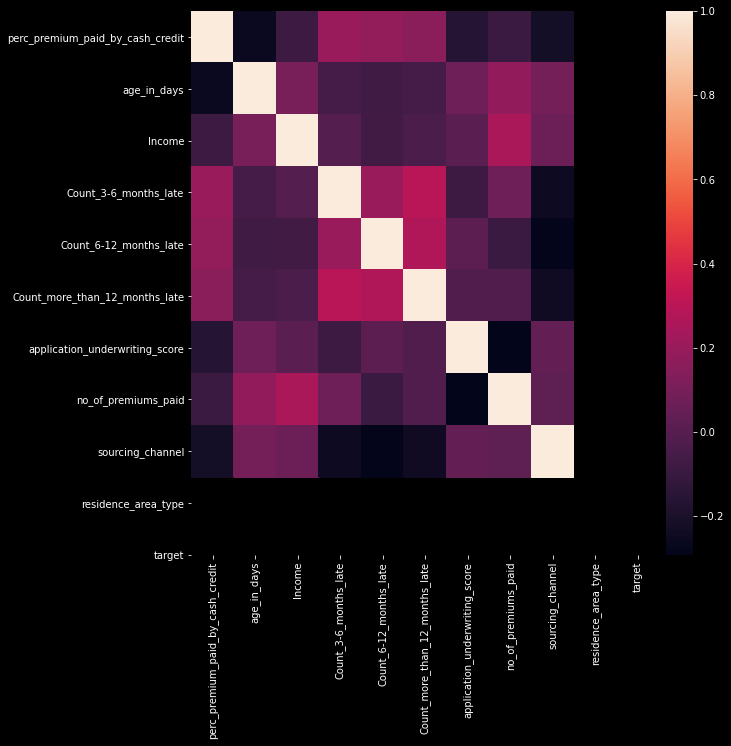

In [41]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr(), xticklabels=data.columns, yticklabels=data.columns)

In [42]:
pd.crosstab(data['residence_area_type'],data['target'])

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


In [43]:
data.groupby('target')['age_in_days'].mean()

target
0    16922.574709
1    18965.600511
Name: age_in_days, dtype: float64

In [44]:
data.groupby('target')['Income'].mean()

target
0    153246.880745
1    176482.260562
Name: Income, dtype: float64

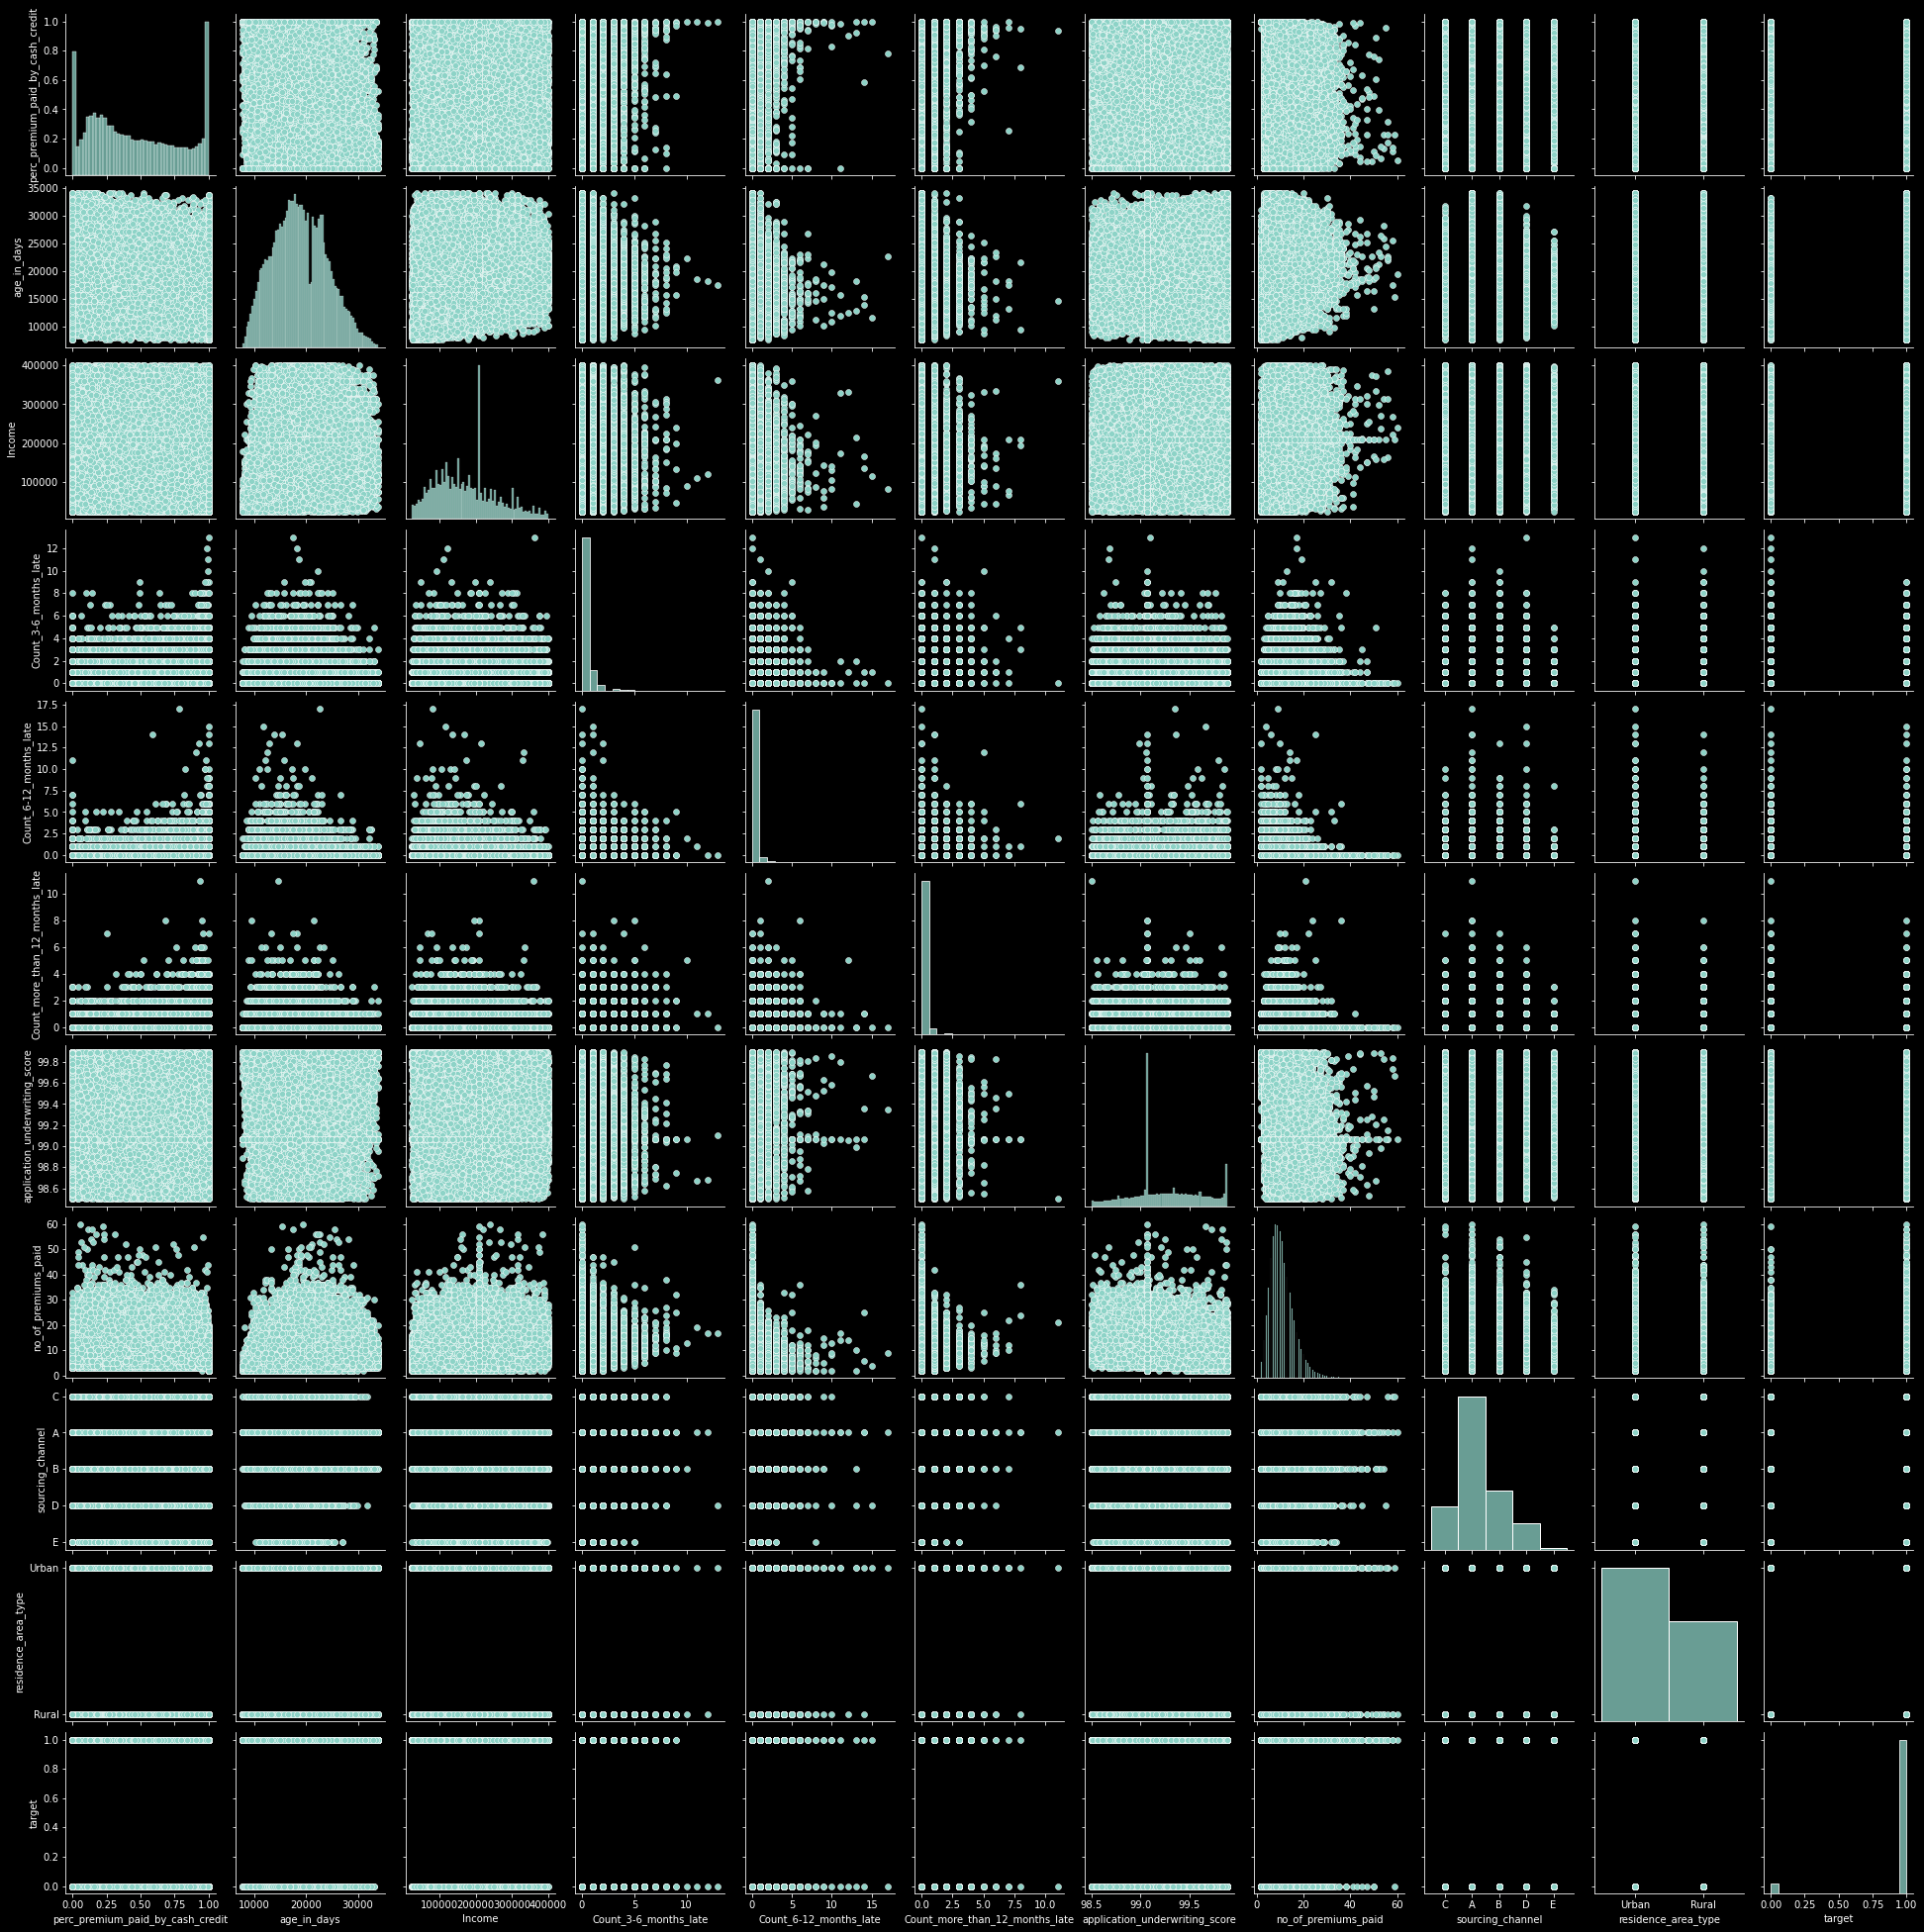

In [45]:
sn.pairplot(data, vars=data.columns)

## Preprocessing 2

In [46]:
data.nunique()

perc_premium_paid_by_cash_credit     1001
age_in_days                           805
Income                              20914
Count_3-6_months_late                  14
Count_6-12_months_late                 17
Count_more_than_12_months_late         10
application_underwriting_score        142
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
target                                  2
dtype: int64

In [47]:
data = pd.get_dummies(data, columns=['residence_area_type', 'sourcing_channel'], drop_first=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   age_in_days                       79853 non-null  float64
 2   Income                            79853 non-null  float64
 3   Count_3-6_months_late             79853 non-null  float64
 4   Count_6-12_months_late            79853 non-null  float64
 5   Count_more_than_12_months_late    79853 non-null  float64
 6   application_underwriting_score    79853 non-null  float64
 7   no_of_premiums_paid               79853 non-null  int64  
 8   target                            79853 non-null  int64  
 9   residence_area_type_Urban         79853 non-null  uint8  
 10  sourcing_channel_B                79853 non-null  uint8  
 11  sourcing_channel_C                79853 non-null  uint8  
 12  sour

In [49]:
data.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,residence_area_type_Urban,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E
0,0.654981,12058.0,355060.0,0.0,0.0,0.0,99.02,13,1,1,0,1,0,0
1,0.100000,21546.0,315150.0,0.0,0.0,0.0,99.89,21,1,1,0,0,0,0
2,0.957601,17531.0,84140.0,2.0,3.0,1.0,98.69,7,0,0,0,1,0,0
3,0.221359,15341.0,250510.0,0.0,0.0,0.0,99.57,9,1,1,0,0,0,0
4,0.228035,31400.0,198680.0,0.0,0.0,0.0,99.87,12,1,1,1,0,0,0


### Splitting the dataset

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['target']),pd.DataFrame(data.target), random_state=42, test_size=0.2)

In [52]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((63882, 13), (15971, 13), (63882, 1), (15971, 1))

### Scaling the dataset

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [56]:
X_train

array([[ 0.83310902, -0.88348167,  0.79431448, ..., -0.42087542,
        -0.32219828, 11.66558344],
       [ 1.53242123, -0.10932999,  0.3360911 , ..., -0.42087542,
        -0.32219828, -0.08572224],
       [ 0.16253275,  1.92944289, -0.97505475, ..., -0.42087542,
        -0.32219828, -0.08572224],
       ...,
       [-0.63604696, -0.10932999,  1.12160006, ..., -0.42087542,
        -0.32219828, -0.08572224],
       [ 0.58919014, -1.23577176, -0.61594811, ...,  2.37600001,
        -0.32219828, -0.08572224],
       [-1.44073439, -0.81410288, -0.85849536, ..., -0.42087542,
        -0.32219828, -0.08572224]])

## Creating the model

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

### GaussinNB

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [60]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
gnb.score(X_test, Y_test)

0.9042639784609605

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.42      0.36      1032
           1       0.96      0.94      0.95     14939

    accuracy                           0.90     15971
   macro avg       0.64      0.68      0.66     15971
weighted avg       0.92      0.90      0.91     15971



In [64]:
confusion_matrix(Y_test, y_pred)

array([[  436,   596],
       [  933, 14006]], dtype=int64)

### MultinomialNB

In [65]:
mnb = MultinomialNB()

In [66]:
mnb.fit(X_train1, Y_train)

MultinomialNB()

In [67]:
y_pred = mnb.predict(X_test1)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
mnb.score(X_test1, Y_test)

0.9353828814726692

In [69]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1032
           1       0.94      1.00      0.97     14939

    accuracy                           0.94     15971
   macro avg       0.72      0.50      0.48     15971
weighted avg       0.91      0.94      0.90     15971



In [70]:
confusion_matrix(Y_test, y_pred)

array([[    1,  1031],
       [    1, 14938]], dtype=int64)

# Inference

The dataset used is the Bank Loan premium dataset which provides the information that the person will pay the next loan premium or not. We go through different features related to the customer and tell that whether he will pay the next loan premium or not. There are 12 columns and around 80000 rows in the dataset. We remove the unnecesaary columns from the dataset such as id. We then impute the missing values with the median and mean. The bivariate and univariate analysis is performed to find relationship between different features. The data is tranformed for attaining normal distribution and scaled for the model. The data is divided into Train and Test with the ratio of 0.8:0.2. Min Max Scaler is used for Multinomial methods and Standard Scaler is used by gaussian. We have created a Naive Bayes Model which will help in solving the churn prediction problem by analysing the past data. We have attained an accuracy of 94% with Multinomial method of Naive Bayes Algorithm. The Gaussian method yields us an accuracy of 90%. It means that out of 100 people we will predict 94 people rightly that they will pay the premium to the bank for bank loan or not.